### The Perceptron

Task: Binary Classification

### 1. Concept

1.1. <ins>Assumption:</ins> The data is linearly separable

1.2. <ins>Classification rule</ins>: A hyperplane separating the two classes is learned from the training data. For a test point, the class is determined by the side of the separating hyperplane in which the point lies.

1.3. <ins>Formal Definition</ins>

> $y_i \in \{-1, +1\}$


> Linearly separating hyperplane : $\mathbf{v} = w^Tx + b$,<br>
where $w$ is the (n$-$1) dimensional weight vector that describes the hyperplane in an n dimensional space

> Classifier:<br>
$$h(x_t) = sign(w^Tx_t + b)$$   where $x_t$ is a test point

1.4. <ins>Parameters of the Hyperplane<ins>
    
The algorithm finds a $w$ by initialising it at $0$ and iterating over the training dataset updating $w$ for every misclassification till none of the training samples are misclassified
    
The offset $b$ is often incorporated within $w$ by the following transformation<br>
$x_i \rightarrow [ x_i, 1]$<br>
$w \rightarrow [w, b]$<br>
$\therefore \mathbf{v} = w^Tx$<br>
Geometrically this tranformation implies that the hyperplane now passes through the origin and the points are rearranged around it. 

1.5. <ins>Historical Context<ins>

One of the earliest Machine Learning alogorithms, developed by Frank Rosenblatt at Cornell in 1958. Created a huge wave of interest in the field when it came out as it was seen as a pioneering attempt at building artificial neural networks. The excitement was follwed by the AI Winter, when a book by Minsky in 1969 showed the Perceptron's inablity to correctly classify the XOR - a simple non-linearly separable data set. It took ten more years until neural network research saw a resurgance in the 1980s.


### 2. Pseudocode

Training Data: $D$

Initialise $\vec{w}$ = 0<br>
while $True$ do<br>
$\hspace{3ex}$m = 0$ \hspace{27 ex}$// initialize the count of misclassifications<br>
$\hspace{3ex}$for ($x_i$, $y_i$) $\in$ $D$ do<br>
$\hspace{6ex}$if $y_i(\vec{w}^T.x_i) <= 0$ then $\hspace{7 ex}$// if ($x_i$, $y_i$) is misclassified update m and $\vec{w}$<br>
$\hspace{9ex}$$\vec{w} = \vec{w} + y_ix_i$<br>
$\hspace{9ex}$m = m + 1<br>
$\hspace{6ex}$end if<br>
$\hspace{3ex}$end for<br>
$\hspace{3ex}$if m = 0 then $\hspace{19 ex}$// after one pass of the data if no point was miscalssified, we have found a separating hyperplane<br>
$\hspace{6ex}$break<br>
$\hspace{3ex}$end if<br>
end while






### 3. Implementation




In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [23]:
N = 200
np.random.seed(3)
m1, cov1 = [9, 8], [[.8, 1], [.25, 1]] ## first gaussian
data1 = np.random.multivariate_normal(m1, cov1, N)
label1 = np.ones(N)

m2, cov2 = [4, 8], [[.8, -.5], [2, .1]] ## second gaussian
data2 = np.random.multivariate_normal(m2, cov2, N)
label2 = np.ones(N) * -1   

X = np.vstack((data1, data2))
y = np.concatenate((label1,label2))


<ipython-input-23-0d7af92f694e>:4: RuntimeWarning: covariance is not positive-semidefinite.
  data1 = np.random.multivariate_normal(m1, cov1, N)
<ipython-input-23-0d7af92f694e>:8: RuntimeWarning: covariance is not positive-semidefinite.
  data2 = np.random.multivariate_normal(m2, cov2, N)


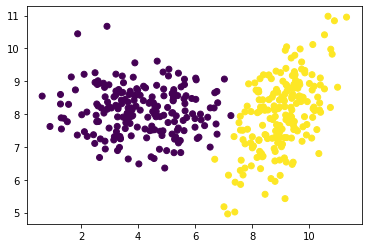

In [24]:
plt.figure()

plt.scatter(X[:,0], X[:,1], c = y)

plt.show()

In [25]:
X = np.c_[X, np.ones(X.shape[0])]
X[:2]

array([[7.67243327, 6.14342253, 1.        ],
       [9.89228459, 7.36234215, 1.        ]])

In [5]:
w = np.zeros(X.shape[1])
w

array([0., 0., 0.])

In [6]:
while True:
    m = 0
    for (xi, yi) in zip(X,y):
        if yi*sum(w*xi) <= 0:
            w = w + yi*xi
            m = m + 1
    if m == 0:
        break
        
print(w)

[ 259.98784379 -160.73463042 -611.        ]


In [8]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [9]:
h = 0.02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [11]:
z = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape[0])]

In [12]:
z1 = np.fromiter((np.sign(sum(i*w)) for i in z), 'float') 

In [13]:
z1 = z1.reshape(xx.shape)

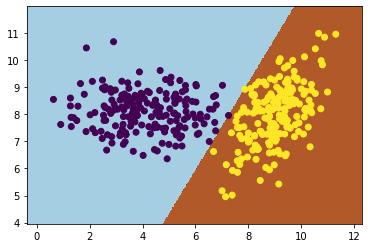

In [19]:
plt.figure()

plt.contourf(xx, yy, z1, cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c = y)

In [ ]:
ax.scatter(X[:, 0], X[:, 1], cmap=plt.cm.Paired)

In [ ]:
fig

### 5. Closing Notes

- Convergence of Perceptron

- Geometic Intuition

- Non linear decision boundaries

